# Exploring AirBnB in Athens


<p/>This is the first project for the course "Applied Machine Learning" in 7th semester of the department of Management Science & Technology  in Athens University of Economics & Business. </p>

---

> Ioanna Ntousaki <br/>
> AM : 8200125 </br>
> Department of Management Science and Technology <br/>
> Athens University of Economics and Business <br/>
> t8200125@aueb.gr

* ## Preparation

In [135]:
# Import the necessary python libraries 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import folium as fl
from folium.plugins import MarkerCluster

* ## Neighbourhood Listings in Descending Order
Show the listings per neighbourhood, with the most popular neighbourhoods first (that is, in decreasing neighbourhood popularity order).


##### *Answer*

We need to find the number of listings for each neighbourhood and sort them in descending order. Then, we will merge the sorted table with the initial one according to the popularity of the neighbourhoods to get the listing ids.

In [136]:
# Read the file 'listings.csv' containing the data of all listings
listings = pd.read_csv('data/listings.csv')

# Count the number of listings in each neighbourhood
grouped = listings['neighbourhood'].value_counts().reset_index(name='listings_in_neighbourhood')

# Sort number of listings is descending order
grouped = grouped.sort_values(by=['listings_in_neighbourhood'], ascending=False)

# Show sorted neighbourhoods
grouped

neighbourhood  listings_in_neighbourhood
0             ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ                       2416
1                ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ                       1122
2                        ΝΕΟΣ ΚΟΣΜΟΣ                        980
3           ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ                        979
4   ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ                        817
5                    ΠΛΑΤΕΙΑ ΑΤΤΙΚΗΣ                        583
6                           ΠΑΓΚΡΑΤΙ                        511
7                        ΑΜΠΕΛΟΚΗΠΟΙ                        452
8                           ΚΟΛΩΝΑΚΙ                        425
9                           ΑΚΡΟΠΟΛΗ                        386
10                            ΘΗΣΕΙΟ                        386
11                         ΠΕΤΡΑΛΩΝΑ                        352
12                        ΚΕΡΑΜΕΙΚΟΣ                        343
13                            ΚΥΨΕΛΗ                        271
14                            ΣΤΑΔΙΟ                        252
15                             ΓΟΥΔΙ                        230
16                            ΙΛΙΣΙΑ                        216
17                  ΠΛΑΤΕΙΑ ΑΜΕΡΙΚΗΣ                        180
18                           ΝΙΡΒΑΝΑ                        174
19                           ΠΑΤΗΣΙΑ                        166
20                        ΛΥΚΑΒΗΤΤΟΣ                        162
21                           ΖΑΠΠΕΙΟ                        161
22                        ΑΝΩ ΚΥΨΕΛΗ                        119
23                             ΓΚΥΖΗ                        118
24                       ΠΕΔΙΟ ΑΡΕΩΣ                        109
25                           ΚΟΛΩΝΟΣ                        108
26                             ΓΚΑΖΙ                        106
27                    ΑΓΙΟΣ ΝΙΚΟΛΑΟΣ                         99
28                   ΣΤΑΘΜΟΣ ΛΑΡΙΣΗΣ                         85
29                         ΒΟΤΑΝΙΚΟΣ                         80
30                 ΑΚΑΔΗΜΙΑ ΠΛΑΤΩΝΟΣ                         76
31                             ΓΟΥΒΑ                         75
32                       ΕΛΛΗΝΟΡΩΣΩΝ                         73
34                        ΝΕΑ ΚΥΨΕΛΗ                         64
33                       ΑΝΩ ΠΑΤΗΣΙΑ                         64
35                    1Ο ΝΕΚΡΟΤΑΦΕΙΟ                         55
36                           ΣΕΠΟΛΙΑ                         45
37                  ΑΓΙΟΣ ΕΛΕΥΘΕΡΙΟΣ                         38
38                          ΠΟΛΥΓΩΝΟ                         29
39                        ΚΟΛΟΚΥΝΘΟΥ                         16
40                         ΡΙΖΟΥΠΟΛΗ                         13
41                          ΠΡΟΜΠΟΝΑ                         12
42                          ΡΗΓΙΛΛΗΣ                          5
43                         ΠΕΝΤΑΓΩΝΟ                          2

In [137]:
# Merge the two tables according to table 'grouped' sorting (Keep only the columns needed)

grouped = pd.merge(listings.loc[:,["neighbourhood", "id"]], grouped.loc[:,["neighbourhood"]], how = 'right', on = 'neighbourhood')

# Show final table
grouped

neighbourhood                  id
0      ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ               28186
1      ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ               49489
2      ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ              240960
3      ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ              306234
4      ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ              361393
...                       ...                 ...
12950                ΡΗΓΙΛΛΗΣ  833192639897741249
12951                ΡΗΓΙΛΛΗΣ  896831410634044652
12952                ΡΗΓΙΛΛΗΣ  969274001097223539
12953               ΠΕΝΤΑΓΩΝΟ             6971162
12954               ΠΕΝΤΑΓΩΝΟ            27082740

[12955 rows x 2 columns]

* ## Neighbourhood Prices in Descending Order

Create a table with the prices per neighbourhood. The prices information should contain:

* median price per neighbourhood

* mean price per neighbourhood

* standard deviation per neighbourhood

* number of listings per neighbourhood.

The contents of the table should be in descending median prices.

##### *Answer*

In [138]:
# Group the listings table by neighbourhood, use the 'price' column for the calculations and sort in descending order by median
result = listings.groupby("neighbourhood")["price"].agg(Listings = 'count', Median = 'median', Std = 'std', Mean = 'mean').sort_values('Median', ascending=False)

In [139]:
result

Listings  Median          Std        Mean
neighbourhood                                                              
ΡΗΓΙΛΛΗΣ                                 5   120.0   578.622675  367.800000
ΖΑΠΠΕΙΟ                                161   114.0   641.163173  224.068323
ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ                2416   104.0   229.183015  140.650662
ΑΚΡΟΠΟΛΗ                               386   100.0   703.321565  195.344560
ΚΟΛΩΝΑΚΙ                               425   100.0   104.431349  128.595294
ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ                   1122    90.5   104.613533  120.284314
ΘΗΣΕΙΟ                                 386    90.0   124.176775  126.492228
ΚΕΡΑΜΕΙΚΟΣ                             343    89.0   136.367487  123.883382
ΛΥΚΑΒΗΤΤΟΣ                             162    75.0    87.859850  104.561728
ΓΚΑΖΙ                                  106    70.5    75.355882   95.792453
ΣΤΑΔΙΟ                                 252    70.0   509.991840  121.515873
ΙΛΙΣΙΑ                                 216    70.0    53.519013   87.189815
ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ               979    67.0  2563.621548  169.259448
ΝΕΟΣ ΚΟΣΜΟΣ                            980    67.0   127.407374   94.586735
ΠΑΓΚΡΑΤΙ                               511    67.0    92.218241   84.062622
ΠΕΤΡΑΛΩΝΑ                              352    66.5   285.518630  104.701705
1Ο ΝΕΚΡΟΤΑΦΕΙΟ                          55    61.0    92.281191   98.818182
ΕΛΛΗΝΟΡΩΣΩΝ                             73    60.0    72.727390   81.589041
ΒΟΤΑΝΙΚΟΣ                               80    60.0    48.042281   78.200000
ΓΟΥΒΑ                                   75    58.0    83.506245   72.240000
ΑΜΠΕΛΟΚΗΠΟΙ                            452    58.0    39.297399   66.915929
ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ       817    58.0    73.453460   78.155447
ΓΟΥΔΙ                                  230    58.0    37.039603   68.952174
ΠΡΟΜΠΟΝΑ                                12    57.0    27.511430   60.833333
ΠΕΔΙΟ ΑΡΕΩΣ                            109    56.0   761.697707  148.137615
ΣΕΠΟΛΙΑ                                 45    55.0   150.067332   77.422222
ΝΕΑ ΚΥΨΕΛΗ                              64    50.0    28.871873   56.453125
ΣΤΑΘΜΟΣ ΛΑΡΙΣΗΣ                         85    50.0    58.615870   61.564706
ΚΥΨΕΛΗ                                 271    50.0    58.884856   62.656827
ΑΚΑΔΗΜΙΑ ΠΛΑΤΩΝΟΣ                       76    50.0   163.926596   79.934211
ΠΛΑΤΕΙΑ ΑΤΤΙΚΗΣ                        583    48.0    74.498484   64.116638
ΑΝΩ ΠΑΤΗΣΙΑ                             64    48.0    29.493774   56.078125
ΚΟΛΩΝΟΣ                                108    47.0    21.263955   51.888889
ΠΕΝΤΑΓΩΝΟ                                2    46.0     1.414214   46.000000
ΠΑΤΗΣΙΑ                                166    45.0   117.601314   60.524096
ΠΟΛΥΓΩΝΟ                                29    45.0    26.467100   54.310345
ΑΓΙΟΣ ΝΙΚΟΛΑΟΣ                          99    45.0    32.861484   53.202020
ΓΚΥΖΗ                                  118    44.5    42.301913   52.033898
ΠΛΑΤΕΙΑ ΑΜΕΡΙΚΗΣ                       180    44.0    37.479603   52.500000
ΡΙΖΟΥΠΟΛΗ                               13    44.0    22.096815   52.538462
ΚΟΛΟΚΥΝΘΟΥ                              16    43.0     9.532182   43.937500
ΝΙΡΒΑΝΑ                                174    42.0    39.449070   53.045977
ΑΝΩ ΚΥΨΕΛΗ                             119    42.0    23.316078   45.932773
ΑΓΙΟΣ ΕΛΕΥΘΕΡΙΟΣ                        38    41.5    17.408734   43.736842

* ## Availability per Day

Create a plot with the number of listings available per day, on the $y$ axis, and the date, on the $x$ axis.

##### *Answer*

We need to see how many listings are available each day of the year.
In order to do that, we need to find the available listings, group them by date and then count the listings for each date.

In [140]:
# Read the file containing the listing availability data of this year
calendar = pd.read_csv('data/calendar.csv')

# Check which listings are available, group them by date and calculate the number of listings for each date 
listings_available = calendar.loc[calendar["available"] == "t", ["date"]].groupby(['date'])['date'].agg(count = 'count').reset_index()

The next step is *Plotting*.

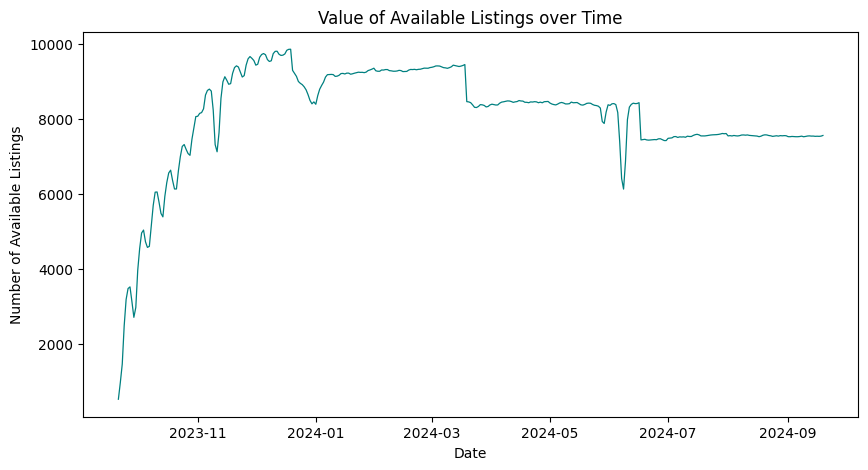

In [141]:
# Convert 'date' column into datetime type
listings_available['date'] = pd.to_datetime(listings_available['date'])
# Specify the proportions/dimentions of the frame
plt.figure(figsize=(10, 5))
# Specify labels
plt.xlabel('Date')
plt.ylabel('Number of Available Listings')
plt.title('Value of Available Listings over Time')
# Define axis of the plot(x-date, y-count) and show
_ = plt.plot(listings_available['date'], listings_available['count'], linewidth=0.9, alpha = 1, color = 'teal')

> **Comment** </br>
> The calendar dataframe contains data from 21-09-2023 to 19-09-2024, so it is very normal to notice this huge gap in availability values among september and the next months, having in mind that many reservations for the upcoming dates have not been made yet.

* ## Reviews, Occupacy per Listing, Average Income

Create a histogram showing the number of reviews per listing. The histogram should bin the number of reviews, from the smallest amount of reviews in a listing, to the maximum number of reviews in a listing rounded up to the closest hundred.

Once you have done that, calculate the average occupacy per listing per month. To calculate that, find the average reviews per month and assume that half of the bookings result in reviews.

Then, assuming that each booking is for a three nights stay, calculate the average income per month, using the average price charged throughout all listings.

##### *Answer*


Text(0.5, 1.0, 'Number of reviews per listing')

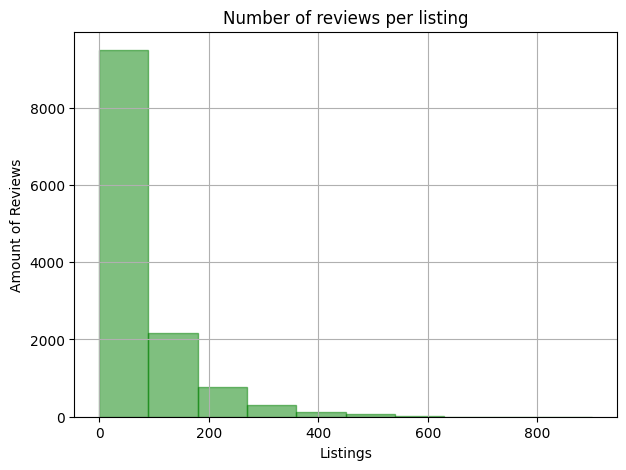

In [142]:
# Get the column that contains the number of reviews per listing
nOfRev = listings['number_of_reviews']

# Sort values and round per nearest hundred 
nOfRev = listings['number_of_reviews'].sort_values().round(decimals=-2)

# Create the histogram 
nOfRev.hist(color='green', edgecolor='green', alpha=0.5, figsize=(7, 5))
plt.xlabel('Listings')
plt.ylabel('Amount of Reviews')
plt.title('Number of reviews per listing')

* We will find the average reviews per month taking into account only the data taken from the last "full" year. </br>
To do that, I will find the most recent review and I will subtract a year. I will only keep the data from this year into a dataframe.

**Last year's (2022) data will be used given the fact that we dont have enough data from this year (2023) because only half it has passed till now.**

In [143]:
# Read the file's data
reviews = pd.read_csv('data/reviews.csv')

# Separate the two columns as they are united by fault
reviews = reviews['listing_id,date'].str.split(',', expand=True)
reviews.columns = ['listing_id','date']
reviews['date'] = pd.to_datetime(reviews['date'], format = '%Y-%m-%d')

# Take last year's data only
reviews = reviews[reviews['date'].dt.year == reviews['date'].max().year - 1]

# We need to sum all reviews of the last year per listing and divide by the sum of months 
avg_revs_per_listing= reviews.groupby('listing_id')['listing_id'].agg(Avg_Reviews = 'count') / 12
avg_revs_per_listing

Avg_Reviews
listing_id             
10008553       1.500000
10027906       1.666667
10045648       2.833333
10082567       0.250000
10130785       4.416667
...                 ...
9770854        4.083333
9844087        1.083333
9876310        4.833333
9958511        1.583333
9970367        1.166667

[7097 rows x 1 columns]

* To find the bookings per listing per month we will double the number of average reviews per listing.

**I choose not to round the reviews number because we talk about an average, and the final result will be a money price, so I think it would be more accurate to leave it as is.**

In [144]:
bookings = avg_revs_per_listing['Avg_Reviews'] * 2
bookings

listing_id
10008553    3.000000
10027906    3.333333
10045648    5.666667
10082567    0.500000
10130785    8.833333
              ...   
9770854     8.166667
9844087     2.166667
9876310     9.666667
9958511     3.166667
9970367     2.333333
Name: Avg_Reviews, Length: 7097, dtype: float64

* To execute this task we'll need to find the average price per night 

In [145]:
avg_price_perNight = listings['price'].mean()

We assume that each booking is for 3 nights, so we will multiply each listing's bookings with the number of nights to get the average monthly income.

In [146]:
monthly_avg_income = bookings * avg_price_perNight * 3
monthly_avg_income

listing_id
10008553     994.127287
10027906    1104.585874
10045648    1877.795986
10082567     165.687881
10130785    2927.152567
               ...     
9770854     2706.235392
9844087      717.980818
9876310     3203.299035
9958511     1049.356580
9970367      773.210112
Name: Avg_Reviews, Length: 7097, dtype: float64

* ## Listings per Room Type

Show the number of listings per room type, in absolute numbers, and also in percentages (the percentage of listings for each particular room type). Then, show the number of listings per neighrbourhood and room type.

##### *Answer*

* For the listings per room type 

In [147]:
# Calculate number of listings per room type
listings_per_room_type = listings.groupby(['room_type'])['room_type'].agg(listings_per_room_type = 'count')

# Calculate the percentage and add it in a new column in the same table
listings_per_room_type['listings_per_room_type_percentage'] = (listings_per_room_type['listings_per_room_type']/listings_per_room_type['listings_per_room_type'].sum()) * 100

# Add percentage symbol 
listings_per_room_type['listings_per_room_type_percentage'] = listings_per_room_type['listings_per_room_type_percentage'].round(2).astype(str) + '%'

# Show number of listings per room type
listings_per_room_type

listings_per_room_type listings_per_room_type_percentage
room_type                                                                
Entire home/apt                   11652                            89.94%
Hotel room                          105                             0.81%
Private room                       1113                             8.59%
Shared room                          85                             0.66%

* For the listings per neighbourhood and room type: </br>
We need to count all the rows that have the same neighbourhoud and room type value.

In [148]:
listings_per_neigh_room_type = listings.groupby(['neighbourhood', 'room_type'])['room_type'].agg(num_of_listings = 'count')
listings_per_neigh_room_type

num_of_listings
neighbourhood                    room_type                       
1Ο ΝΕΚΡΟΤΑΦΕΙΟ                   Entire home/apt               55
ΑΓΙΟΣ ΕΛΕΥΘΕΡΙΟΣ                 Entire home/apt               33
                                 Private room                   5
ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ Entire home/apt              686
                                 Hotel room                     4
...                                                           ...
ΣΤΑΔΙΟ                           Private room                  11
ΣΤΑΘΜΟΣ ΛΑΡΙΣΗΣ                  Entire home/apt               73
                                 Hotel room                     4
                                 Private room                   4
                                 Shared room                    4

[111 rows x 1 columns]

* ## Prices per Day

Create a table with the average price per listing per day. Draw a graph visualizing the table.

##### *Answer* 

* First of all, the 'price' column in calendar dataframe has dollar symbols that do not allow numeric calculations. So, we need to remove those symbols in order to be able to apply numeric functions upon data.

In [149]:
# Remove redundant symbols
calendar['price'] = pd.to_numeric(calendar['price'].replace('[\$,]', '', regex=True), errors='coerce')

# Calculate the average price for each listing
avg_per_listing_per_day = calendar.groupby(['date'])['price'].agg(Average_price = 'mean').reset_index()
avg_per_listing_per_day

date  Average_price
0    2023-09-21     113.107689
1    2023-09-22     116.212290
2    2023-09-23     116.264860
3    2023-09-24     113.045932
4    2023-09-25     111.629226
..          ...            ...
360  2024-09-15     110.923736
361  2024-09-16     110.402933
362  2024-09-17     110.385488
363  2024-09-18     110.298572
364  2024-09-19     110.255577

[365 rows x 2 columns]

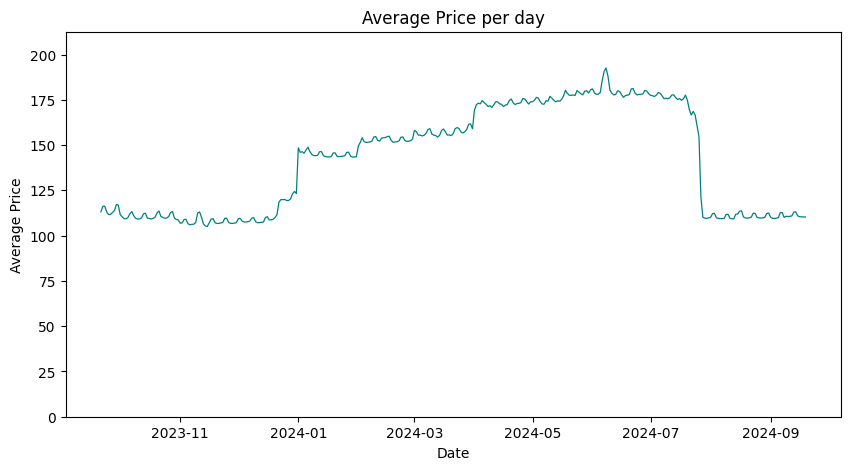

In [150]:
# Convert 'date' column into datetime type
avg_per_listing_per_day['date'] = pd.to_datetime(avg_per_listing_per_day['date'])

# Specify the proportions/dimentions of the frame
plt.figure(figsize=(10, 5))
# Specify labels
plt.ylim(0, avg_per_listing_per_day['Average_price'].max() + 20)
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.title('Average Price per day')
# Define axis of the plot(x-date, y-count) and show
_ = plt.plot(avg_per_listing_per_day['date'], avg_per_listing_per_day['Average_price'].apply(pd.to_numeric) , linewidth=0.9, alpha = 1, color = 'teal')

* ## Listings per Host

Create a table with the number of listings per host, in descending order. Create a graph that will show the distribution of listings per host, as follows:

* You will rank the host on a number of listings basis. So, the first host will be the one with the largest number of listings, the second host will be the one with the second largest number of listings, etc. If there is a number of hosts with the same listings, just add them in sequence. For instance, if there are 10 hosts with one listing each, add them in the ranking with any order between them.

* On the $y$ axis you will have the number of listings.

That is, a point $(x, y)$ will mean that the $x$-th highest hosting host has $y$ listings.

After you have drawn the plot, do another one, this time with the $x$ axis in *logarithmic* scale.


##### *Answer*

In [151]:
# Count number of listings per host, in descending order
listings_per_host = listings['host_id'].value_counts().sort_values(ascending = False).reset_index()
listings_per_host

host_id  count
0      20104194    114
1     113548208     88
2      90390850     78
3        748818     74
4      47267002     61
...         ...    ...
5769   46490655      1
5770   70507227      1
5771   93116996      1
5772  490569700      1
5773   30413739      1

[5774 rows x 2 columns]

In [152]:
# Shift all the index values one position to the right (0 -> 1 etc.) 
# To insure that it can be presented in a logarithmic scale without problems
listings_per_host = listings_per_host.shift()[1:]
listings_per_host

host_id  count
1      20104194.0  114.0
2     113548208.0   88.0
3      90390850.0   78.0
4        748818.0   74.0
5      47267002.0   61.0
...           ...    ...
5769   21459678.0    1.0
5770   46490655.0    1.0
5771   70507227.0    1.0
5772   93116996.0    1.0
5773  490569700.0    1.0

[5773 rows x 2 columns]

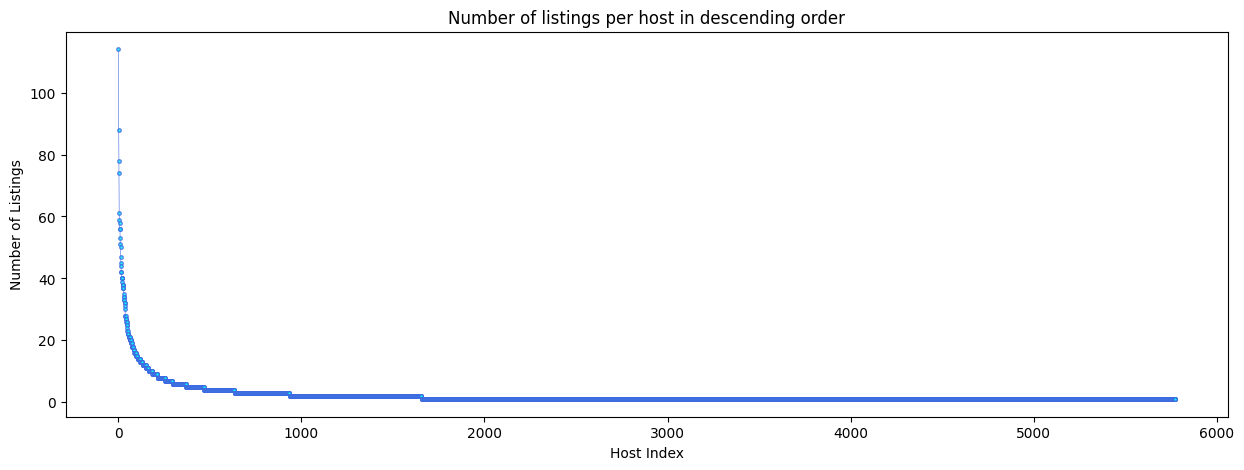

In [153]:
plt.figure(figsize = (15,5))
plt.xlabel('Host Index')
plt.ylabel('Number of Listings')
plt.title('Number of listings per host in descending order')
_ = plt.plot(listings_per_host.index, listings_per_host['count'],marker = 'o',markerfacecolor='cyan',markersize= '2.5',linewidth=0.5, alpha=0.8, color = 'royalblue')

> This result does not allow us to see the scale of values clearly because of the large amount of points distributed over a small area. </br>
> Logarithmic scale can provide a more legible graph.

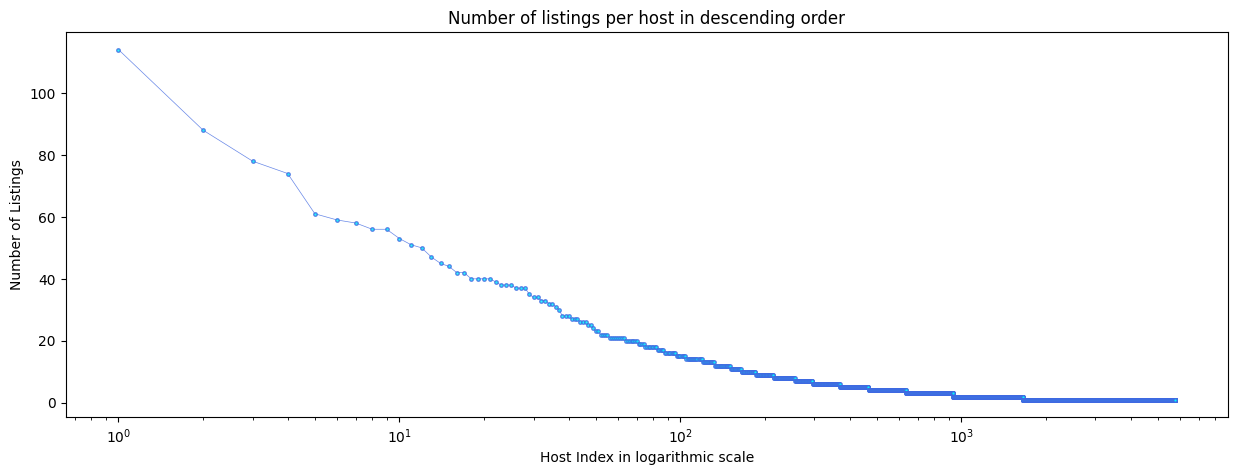

In [154]:
plt.figure(figsize = (15,5))
plt.xscale('log')
plt.xlabel('Host Index in logarithmic scale')
plt.ylabel('Number of Listings')
plt.title('Number of listings per host in descending order')
_ = plt.plot(listings_per_host.index, listings_per_host['count'],marker = 'o',markerfacecolor='cyan',markersize= '2.5',linewidth=0.5, alpha=0.8, color = 'royalblue')

* ## Visualize Listings

Draw an interactive map to show the listings ovelayed on Athens.

You can use the [folium](https://github.com/python-visualization/folium) library to create your map; spend some time reading the documentation.

The map should show each listing and on clicking on top of it, the user should see a short description of the listing.

Note that such a map is heavy on resources. You will probably *not* be able to include it in a Jupyter notebook, so you should save it to an external HTML file that can be opened by any browser. Also, to make things easier, you make wish to limit the maximum zoom level from 12 to 15 (after you read folium's documentation you will know what this is).

Hint: be careful witht he description data, if they contain some characters they may not be rendered in HTML and may destroy your output.

##### *Answer*

We have an mass number of location pins that need to be visualized and so, a very heavy file should be produced.</br>
In order to avoid that, I will use **location clustering** to illustrate the spots while the user zooms on them. </br>
This technique has the advantage of space saving, quicker execution and better visualization for the user as it is easy</br>
to detect the neighbourhood of interest and then focus on the individual spots located in it.

In [155]:
# Creating a map with Athens location Coordinates as point of interest
# To do that, I will use the mean Longtitude and latitude coordinates from the listings table
m = fl.Map(location=(listings['latitude'].mean(),listings['longitude'].mean()), zoom_start=12,width="%100",height="%100")

cluster = MarkerCluster() 
# Add popups and details
for index, row in listings.iterrows():
    description = (f'''
        <h3>Price: </h3><h4>{ row["price"] }$</h4>
        <h3>Details: </h3><h4>{ row["name"] }</h4><br>''')
    frame = fl.IFrame(description, width=400, height=200)
    popup = fl.Popup(frame, max_width=1500)
    fl.Marker([row['latitude'], row['longitude']], popup=popup).add_to(cluster)

m.add_child(cluster)
# Save the map into an html file
m.save("map.html")
